Bunu takip edicez:
        
        1-Problemin tanımı
        2- Data
        3 - Değerlendirme
        4 - Features(Özellikler)
        5 - Modelling
        6 - Deney

## 1- Problem tanımı

Bir hastaya ait klinik parametreler göz önüne
alındığında kalp rahatsızlığı var mı ?
buna bakıyoruz

## 2.Data

Orijinal data UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease
Kaggleda da bir başka versiyonu var.
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Değerlendirme
Accuracy de %95 doğruluğa ulaşırsak projeyi 
sürdüreceğiz.

## 4. Features
**Create data dictionary**

    1- age: age in years
    2- sex: sex (1 = male; 0 = female)
    3- cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
    4- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    5- chol: serum cholestoral in mg/dl
    6- fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
    7- restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    8- thalach: maximum heart rate achieved
    9- exang: exercise induced angina (1 = yes; 0 = no)
    10- oldpeak = ST depression induced by exercise relative to rest
    11- slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
    12- ca: number of major vessels (0-3) colored by flourosopy
    13- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    14- num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing

## Preparing the tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  
# Not defterinde plotlar istiyoruz.

# Scikit learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows,columns)

(303, 14)

## Data Exploration ( Keşifçi veri analizi veya exploratory data analysis)

Buradaki amaç veriseti hakkında daha fazla bilgi sahibi olmak:

    1.What questions are you trying the solve?
    2.What kind of data do we have and how do we treat different types?
    3.What's missing from the data and how do you deal with it?
    4.Where are the outliers and why should you care about them?
    5. How can you add,change or remove features to get more out of your data?


In [3]:
 df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

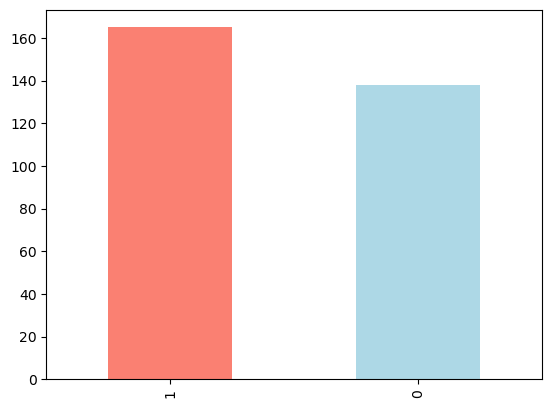

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
##missing değerler var mı?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease frequency according to Sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#target kolonu ile cinsiyet kolonunu compare ettik.
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


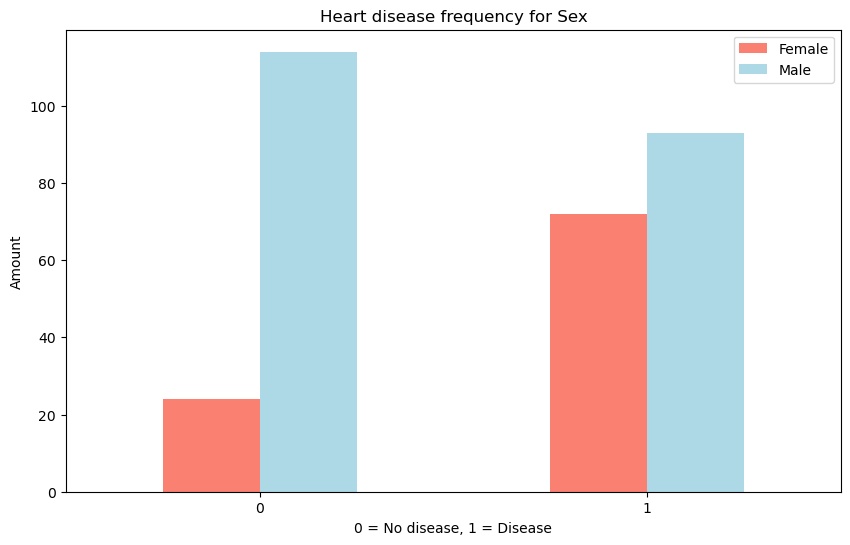

In [12]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"]);
plt.title("Heart disease frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Heart Disease

In [13]:
df.age[df.target==1].head(10)
#yaş kolonunu getir ama sadece target ı 1 olanları getir.

0    63
1    37
2    41
3    56
4    57
5    57
6    56
7    44
8    52
9    57
Name: age, dtype: int64

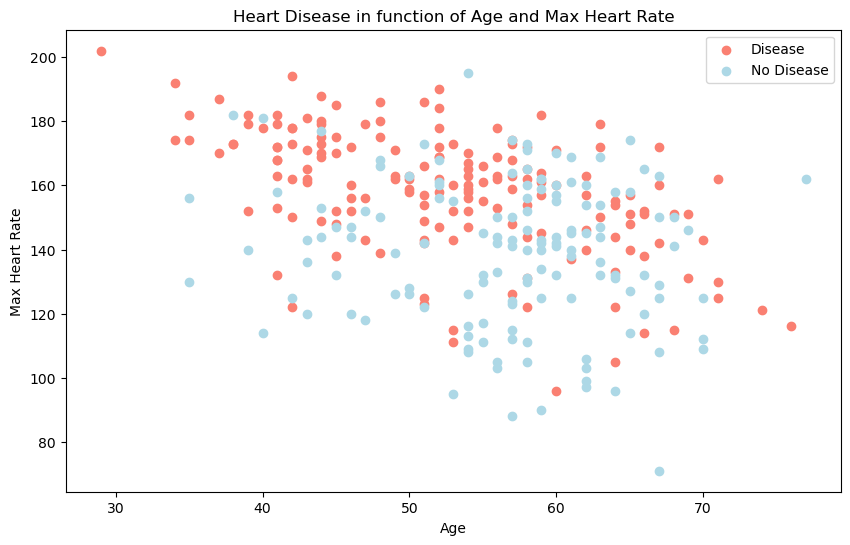

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon"
           )
#Negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");
#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease" ,"No Disease"]);

<Axes: ylabel='Frequency'>

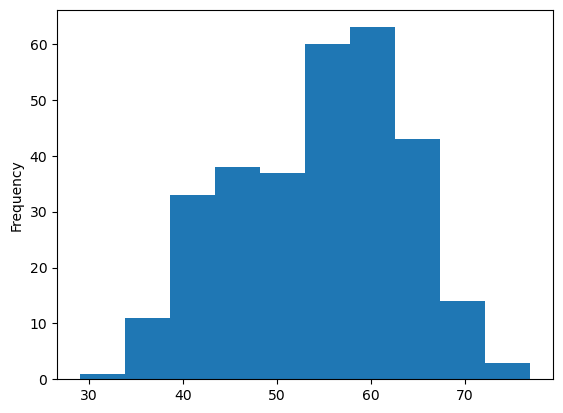

In [15]:
#Yaş kolonunu histogram ile inceleyelim.
df.age.plot.hist()

## Heart Disease Frequency per Chest Pain type
3- cp: chest pain type

    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic


In [16]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


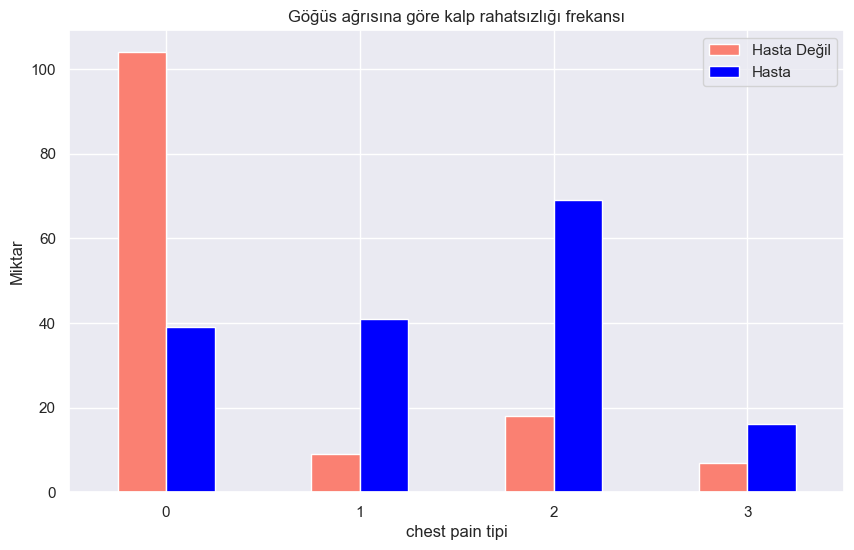

In [71]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","blue"]);
#Görselleştirmeyi ayarla
plt.title("Göğüs ağrısına göre kalp rahatsızlığı frekansı")
plt.xlabel("chest pain tipi")
plt.ylabel("Miktar")
plt.legend(["Hasta Değil","Hasta"])
plt.xticks(rotation=0);  ## X çizgisinde 0,1,2,3 ler yan döndürüyor ki düz dursun..

## KORELASYON

-Kardeşim bu target dışındaki bağımsız değişkenler, birbiriyle nasıl iletişime giriyor.

In [18]:
#Bir correlation matrix oluşturalım.
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

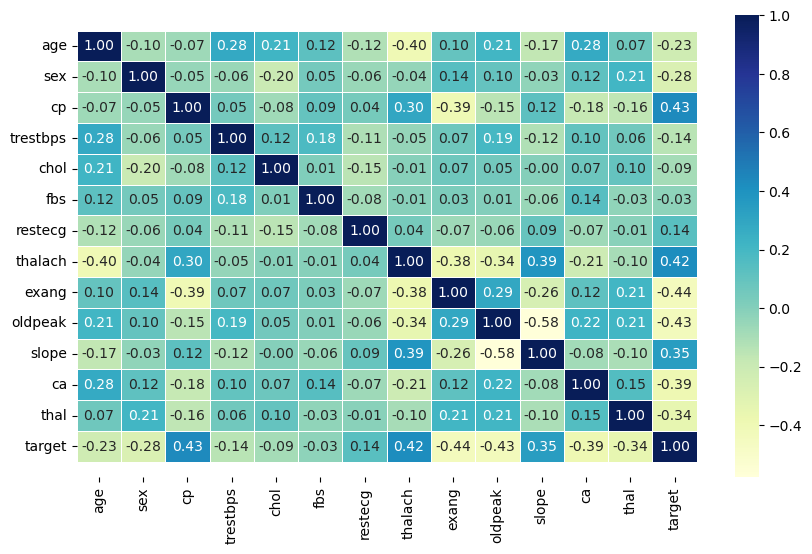

In [19]:
# Korelasyon matrisimizi birazcık güzelleştirelim.
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

    --> Daha yüksek bir pozitif değer, pozitif bir korelasyon anlamına gelir.
    --> Daha yüksek bir negatif değer, negatif bir korelasyon olur ve düşüş anlamına gelir.
     --> Korelasyon matrisine göre "cp" arttıkça hedef değer de yükselmeli
     Çünkü bu bir pozitif korelasyondur.
     --> Yani bir bakıma korelasyon matrisinde hangi kolon daha çok etki ediyorsa target kolonunda zaten belli olur.
     --> cp, thalach, slope gibi kolonlar pozitif korelasyonludur.

## 5.Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
#Split data into X, y
X = df.drop("target", axis=1)

y = df["target"]

In [22]:
y
#Binary classifiaction (ikili sınıflandırma) yani sadece 2 seçenek var, 0, 1

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

3 Farkl Model ile deneme yapıcaz.
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [23]:
# Split at
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
# Modelleri dictionary e koy.
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# Fonksiyon Oluştur , fit ve score elde et.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Verilen ML modellerine fit olur ve değerlendirilir.
    models : Farklı Scikit-Learn Makine Öğrenmesi modellerinin dict hali.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #Random seed at.
    np.random.seed(42)
    #Boş dict oluştur ki scoreları oraya koyalım.
    model_scores = {}
    #Modellerle döngü oluşturma.
    for name, model in models.items():
        #Modeli veriyle fit et.
        model.fit(X_train, y_train)
        #modeli değerlendir.
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            y_train=y_train,
                            X_test=X_test,
                            y_test=y_test)
model_scores

C:\Users\Nuri\anaconda3\envs\nurienv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [27]:
#Skorları dataframe şeklinde göstermek
pd.DataFrame(model_scores, index=["accuracy"])

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


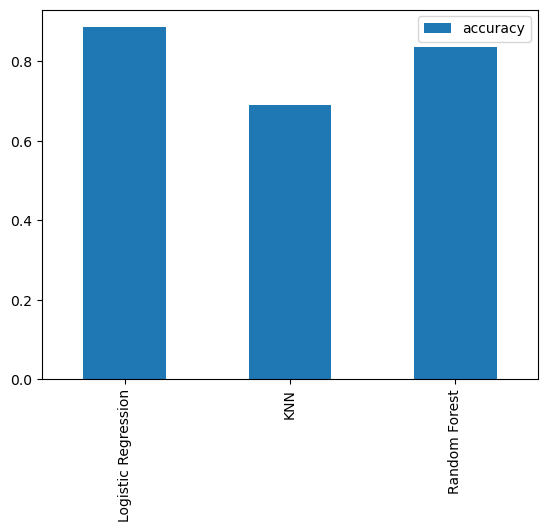

In [28]:
#Grafiğe dökersek:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [29]:
# KNN ayarlama(tuning)

train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1, 21)

#Setup KNN instance
knn = KNeighborsClassifier()
#n_neighbors larla döngü:
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algoritm
    knn.fit(X_train, y_train)
    
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


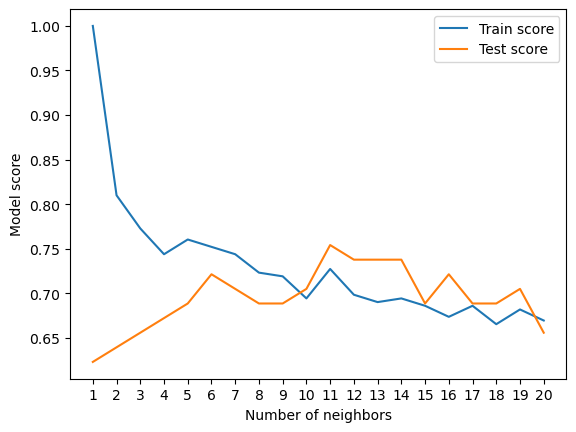

In [32]:
plt.plot(neighbors,train_scores, label="Train score");
plt.plot(neighbors, test_scores, label="Test score");
plt.xticks(np.arange(1,21,1)) #axis x de 1,21 arasında 1er 1er gider.
plt.xlabel("Number of neighbors");
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

KNeighbors şimdilik çöp oldu %75 oran verdiği için...

## Hyperparameter tuning with RandomizedSearchCV

Ayarlanacaklar:
* LogisticRegression()
* RandomForestClassifier()

    ....Using RandomizedSearchCV

In [33]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
# LogisticRegression için hyperparameter grid(kafesi)
# Bu değerleri RandomizedSearchCV de kullanıcaz.
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver" : ["liblinear"]}

#RandomForestClassifier için  hiperparametre gridi oluştur.
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None,3,5,10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2)}

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
# Tune LogisticRegression

np.random.seed(42)

#Setup random hyperparameter  search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

İstediğimiz skoru alamadık ilk aldığımız ile aynı çıktı.
Şimdi bu RandomizedSCV yi RandomForest için yazayım..

In [39]:
#Random seed
np.random.seed(42)
#Hiper parametreleri ayarla.
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                           n_iter=20,
                          verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
##Evaluate The randomized search RandomForest
rs_rf.score(X_test, y_test)

0.8688524590163934

In [42]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Elimizdeki en iyi değer hala LogisticRegression
Onun için ona önem vericez.
1. El ile ayarlama --> Zaten baktık ama yemedi.
2. RandomizedSearchCV  --> Her zaman deneyebiliriz.Diğer ayarları değiştirerek
3. GridSearchCV  --> Deneyecez.

## GridSearchCV ile hyperparameter tuning

LogisticRegression modelimiz şu ana kadarki en iyi skorları sağladığından, bunları GridSearchCV 
kullanarak tekrar deneyip iyileştirmeye çalışacağız.

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver" : ["liblinear"]}

#LogisticRegression için hyperparametre gridi oluşturma.
gs_log_reg = GridSearchCV(LogisticRegression(),
                       param_grid = log_reg_grid,
                       cv = 5,
                       verbose = True)
#fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
# best hyperparametreyi kontrol et.
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test,y_test)
#RandomizedSearch ile aynı score verdi ama yine de logisticRegressionu kullanıcaz.

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* confusion matrix
* Classification report
* Precision
* Recall
* F1-score


In [47]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [48]:
round(gs_log_reg.score(X_test,y_test),2)

0.89

In [49]:
#Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


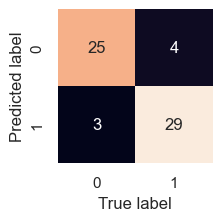

In [50]:
sns.set(font_scale=1.0)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(2,2))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test, y_preds)

Confusion matrix aldık sırası ile:

        -classification report
        -cross-validated precision
        -recall and f1 score
     

In [51]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Cross Validation kullanarak değerlendirme:
    precision, recall and f1-score hesaplama
    `cross_val_score()`

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
# Check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
# En iyi parametreleri kullanarak yeni bir clas. modeli oluşturalım.
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [55]:
# Cross_val   accuracy
#cv çekerek X ve y leri farklı yerlerden ayırdı.ona göre model olşturdu.
#Score da ona göre değişiklik ögsteriyor.
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [56]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [57]:
#Cross-validated precision
cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [58]:
#Cross-validated recall
cv_recall = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [59]:
#Cross-validated recall
cv_f1 = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [60]:
# cv metriclerimizi görselleştirelim.
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_precision,
                          "Recall" : cv_recall,
                          "f1" : cv_f1},index=["metrics"])
cv_metrics

,Accuracy,Precision,Recall,f1
metrics,0.847978,0.821587,0.927273,0.87054


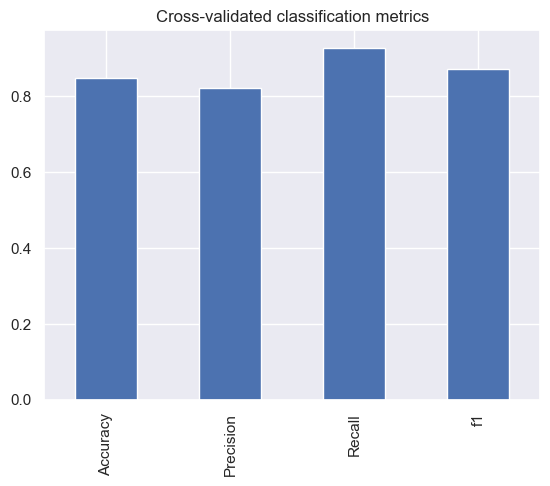

In [61]:
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

Modelin sonuçlarına en çok hangi özellikler katkıda bulundu ve bunlar nasıl katkıda bulundu?


In [62]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [63]:
# check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [64]:
feature_dict = df.columns, list(clf.coef_[0])
feature_dict

(Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
       dtype='object'),
 [0.0032076873709286024,
  -0.8606204735539111,
  0.6600143086174385,
  -0.01155970641957489,
  -0.0016649609500147373,
  0.04017238940156104,
  0.3160340177157746,
  0.02458922261936637,
  -0.6047017032281077,
  -0.567954572983317,
  0.4508539117301764,
  -0.6373332602422034,
  -0.6755508982355707])

In [65]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

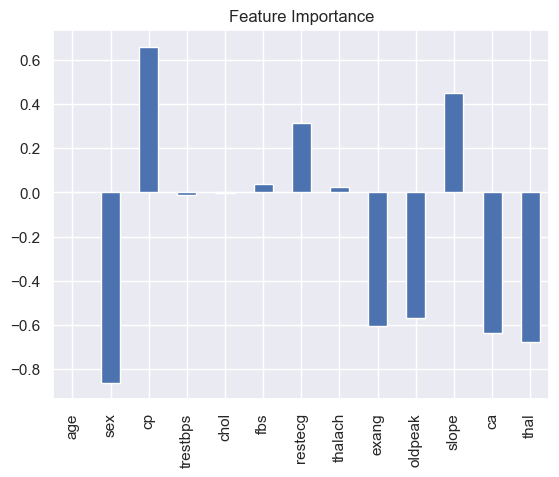

In [66]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance" , legend=False);

In [67]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


Örnek olarak cinsiyet negatif bir şekilde ilerliyor.
Bu da demek oluyor ki bu Negatif bir korelasyondur, bu da cinsiyetin güçlü, negatif veya 
negatif bir katsayı olduğu anlamına gelir.

In [68]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


0 1 2 diye artınca target kısmında aradaki fark açıkça açılmış:

     12 --> 9 iken
     1 de ise   91 --> 49 kişi olmuş
     2 de ise 35 --> 107 kişi olmuş
     
Modelimize göre pozitif bir korelasyonumuz , pozitif bir katsayımız(coefficient) var.

slope: the slope of the peak exercise ST segment

    * Value 1: upsloping  --> better heart rate with exercise(olağandışı)
    * Value 2: flat slopping --> minimal change (typical healthy heart)
    * Value 3: downsloping --> signs of unhealthy heart

## Experimentation

İstediğimiz evaluation metriğine ulaşamadıysak kendimize şunları soralım:

    * Daha fazla veri toplayabilir miyiz ?
    * Farklı modeller deneyebiliriz.Catboost ya da XGBoost?
    * Halihazıra olan modeli geliştirebiliriz.
    * Model yeterince iyi , paylaş o zaman diğerleriyle.